In [1]:
import csv
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def remove_chars(str):
    removeChars = " '\"\\[]"
    return ''.join(ch for ch in str if ch not in removeChars)

In [5]:
tags = {}
ings = {} # dictionary for ingredients
tagNum = 0
ingNum = 0
ridToIdx = {}
ridx = 0

In [7]:
with open('RAW_recipes.csv', mode='r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    for row in reader:
        for tag in row['tags'].split(','):
            rtag = remove_chars(tag)
            if rtag not in tags:
                tags[rtag] = [tagNum, 1]
                tagNum += 1
            else:
                tags[rtag][1] += 1
        for ing in row['ingredients'].split(','):
            ring = remove_chars(ing)
            if ring not in ings:
                ings[ring] = [ingNum, 1]
                ingNum += 1
            else:
                ings[ring][1] += 1
        if row['id'] not in ridToIdx:
            ridToIdx[row['id']] = ridx
            ridx += 1

In [8]:
# consider ingredients appearing more than ingThreshold times
ingsUpperThresh = {}
iIdx = 0
ingThreshold = 500
for key, value in ings.items():
    if value[1] >= ingThreshold:
        ingsUpperThresh[key] = [iIdx, value[1]]
        iIdx += 1

In [9]:
# remove tags occuring below tagThreshold times 
tagsUpperThresh = {}
newIdx = 0
tagThreshold = 5
for t in tags:
    if tags[t][1] >= tagThreshold:
        tagsUpperThresh[t] = [newIdx, tags[t][1]]
        newIdx += 1

In [10]:
# convert tags of a recipe to a vector
def tag_to_vec(recipeTags):
    tagVec = [0 for _ in range(len(tagsUpperThresh))]
    rTags = recipeTags.split(',')
    for rt in rTags:
        rt = remove_chars(rt)
        if rt in tagsUpperThresh:
            tagVec[tagsUpperThresh[rt][0]] = 1
    return tagVec

In [15]:
# convert ingredients of a recipe to a vector
def ing_to_vec(ingredients):
    ingVec = [0 for _ in range(len(ingsUpperThresh))]
    rIngs = ingredients.split(',')
    for ri in rIngs:
        ri = remove_chars(ri)
        if ri in ingsUpperThresh:
            ingVec[ingsUpperThresh[ri][0]] = 1
    return ingVec

In [17]:
# make a preprocessed file from the source file
with open('RAW_recipes_textProc.csv', mode='r', encoding='utf-8') as fr, \
    open(f'RAW_recipes_textProc_VecTag(th={tagThreshold})_VecIng(th={ingThreshold}).csv', mode='w', encoding='utf-8', newline='') as fw:
        reader = csv.DictReader(fr)
        writer = csv.DictWriter(fw, fieldnames=reader.fieldnames)
        writer.writeheader()
        for row in reader:
            if 'ingredients' in row:
                row['ingredients'] = ing_to_vec(row['ingredients'])
            if 'tags' in row:
                row['tags'] = tag_to_vec(row['tags'])
            row['id'] = ridToIdx[row['id']]
            writer.writerow(row)

In [18]:
with open('Mapping_recipe_id.csv', mode='w', encoding='utf-8', newline='') as fw:
    fieldnames = ['recipe_id', 'new_recipe_id']
    writer = csv.DictWriter(fw, fieldnames=fieldnames)
    writer.writeheader()
    for key, value in ridToIdx.items():
        row = {}
        row['recipe_id'] = key
        row['new_recipe_id'] = value
        writer.writerow(row)

In [19]:
with open('Mapping_tag.csv', mode='w', encoding='utf-8', newline='') as fw:
    fieldnames = ['tag_name', 'index', 'frequency']
    writer = csv.DictWriter(fw, fieldnames=fieldnames)
    writer.writeheader()
    for key, value in tags.items():
        row = {}
        row['tag_name'] = key
        row['index'] = value[0]
        row['frequency'] = value[1]
        writer.writerow(row)

In [20]:
with open(f'Mapping_tag_th={tagThreshold}.csv', mode='w', encoding='utf-8', newline='') as fw:
    fieldnames = ['tag_name', 'index', 'frequency']
    writer = csv.DictWriter(fw, fieldnames=fieldnames)
    writer.writeheader()
    for key, value in tagsUpperThresh.items():
        row = {}
        row['tag_name'] = key
        row['index'] = value[0]
        row['frequency'] = value[1]
        writer.writerow(row)

In [21]:
with open('Mapping_ingred.csv', mode='w', encoding='utf-8', newline='') as fw:
    fieldnames = ['ingredient', 'index', 'frequency']
    writer = csv.DictWriter(fw, fieldnames=fieldnames)
    writer.writeheader()
    for key, value in ings.items():
        row = {}
        row['ingredient'] = key
        row['index'] = value[0]
        row['frequency'] = value[1]
        writer.writerow(row)

In [22]:
with open(f'Mapping_ingred_th={ingThreshold}.csv', mode='w', encoding='utf-8', newline='') as fw:
    fieldnames = ['ingredient', 'index', 'frequency']
    writer = csv.DictWriter(fw, fieldnames=fieldnames)
    writer.writeheader()
    for key, value in ingsUpperThresh.items():
        row = {}
        row['ingredient'] = key
        row['index'] = value[0]
        row['frequency'] = value[1]
        writer.writerow(row)

In [23]:
tagStat = []
for t in tags:
    tagStat.append(tags[t])
tagStat.sort(key=lambda x:x[1], reverse=True)

In [24]:
values = [math.log2(x[1]) for x in tagStat]

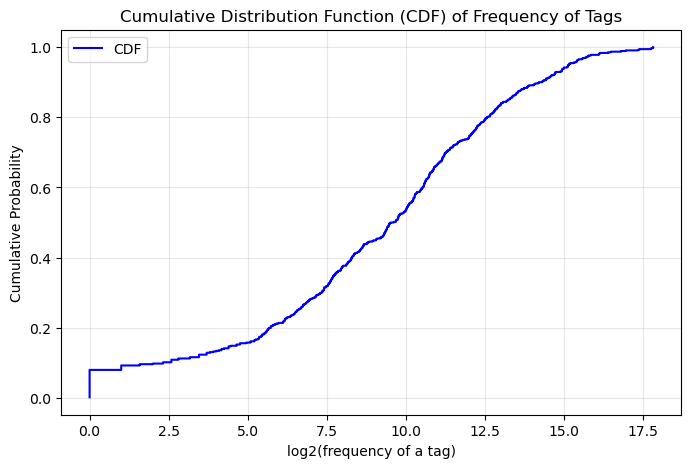

In [51]:
import matplotlib.pyplot as plt
import numpy as np

sorted_values = sorted(values)
cdf = np.cumsum(np.ones(len(sorted_values)) / len(sorted_values))

plt.figure(figsize=(8, 5))
plt.step(sorted_values, cdf, where='post', label="CDF", color="blue")
plt.xlabel('log2(frequency of a tag)')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF) of Frequency of Tags')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

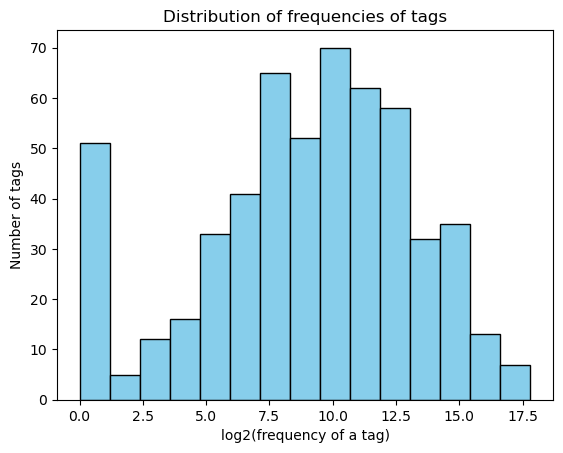

In [25]:
plt.hist(values, bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of frequencies of tags')
plt.xlabel('log2(frequency of a tag)')
plt.ylabel('Number of tags')
plt.show()

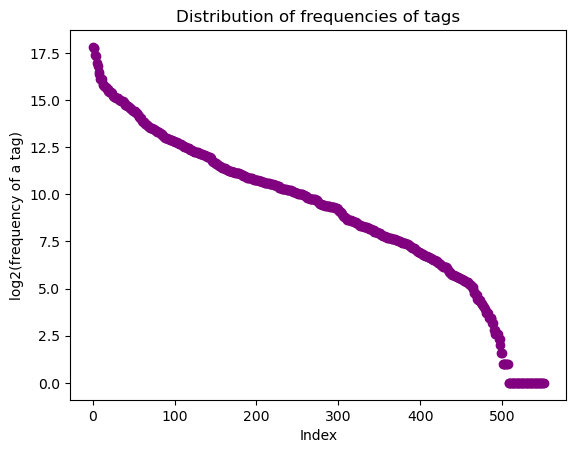

In [26]:
indices = [x for x in range(len(values))]
plt.scatter(indices, values, color='purple')
plt.title('Distribution of frequencies of tags')
plt.xlabel('Index')
plt.ylabel('log2(frequency of a tag)')
plt.show()

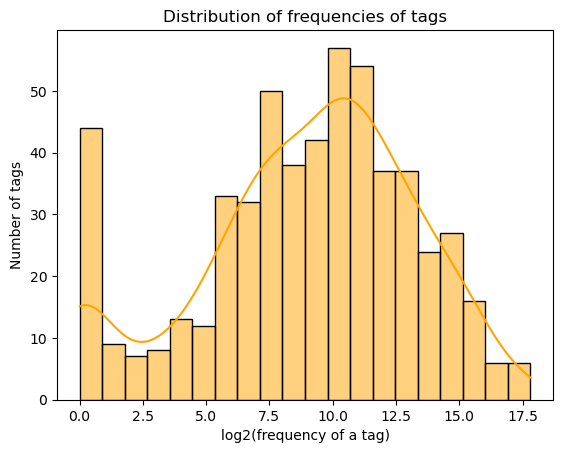

In [27]:
sns.histplot(values, bins=20, kde=True, color='orange')
plt.title('Distribution of frequencies of tags')
plt.xlabel('log2(frequency of a tag)')
plt.ylabel('Number of tags')
plt.show()

In [81]:
ingStat = []
for t in ings:
    ingStat.append(ings[t])
ingStat.sort(key=lambda x:x[1], reverse=True)
ingValues = [math.log2(x[1]) for x in ingStat]

In [83]:
sorted_ingvalues = sorted(ingValues)
ingcdf = np.cumsum(np.ones(len(sorted_ingvalues)) / len(sorted_ingvalues))

In [85]:
len(ingcdf)

14886

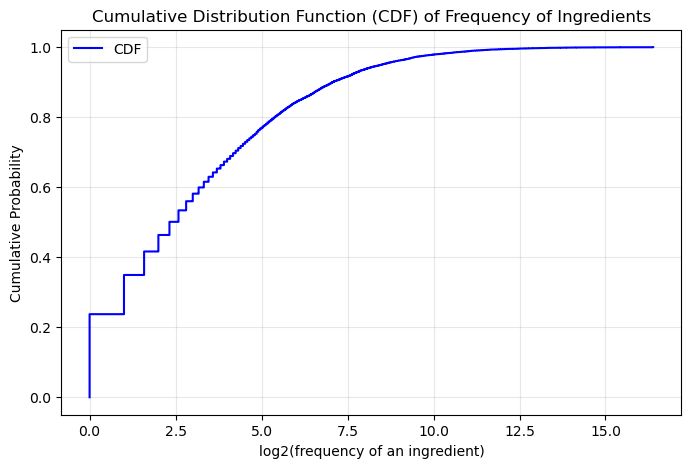

In [87]:
plt.figure(figsize=(8, 5))
plt.step(sorted_ingvalues, ingcdf, where='post', label="CDF", color="blue")
plt.xlabel('log2(frequency of an ingredient)')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF) of Frequency of Ingredients')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

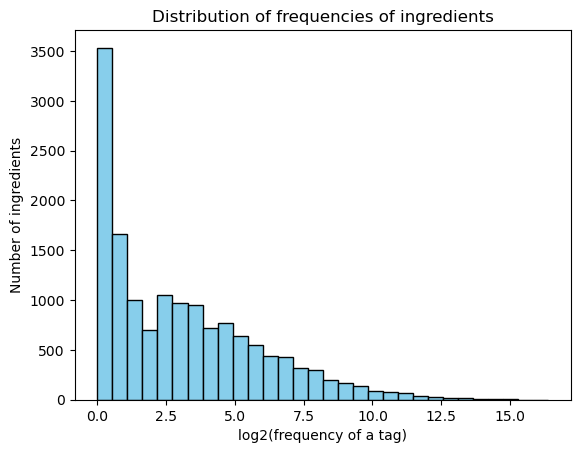

In [29]:
plt.hist(ingValues, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of frequencies of ingredients')
plt.xlabel('log2(frequency of a tag)')
plt.ylabel('Number of ingredients')
plt.show()

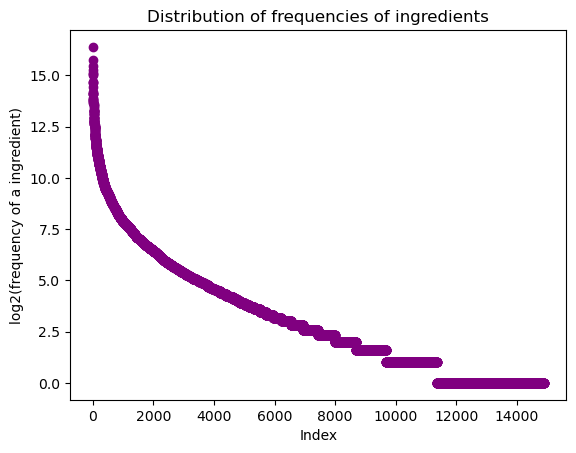

In [30]:
indices = [x for x in range(len(ingValues))]
plt.scatter(indices, ingValues, color='purple')
plt.title('Distribution of frequencies of ingredients')
plt.xlabel('Index')
plt.ylabel('log2(frequency of a ingredient)')
plt.show()